### Medical_Cost_Insurance_Prediction

##### Importing the Dataset

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [153]:
df=pd.read_csv(r'C:\Users\Dell\Documents\medical_cost.csv')

In [154]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [155]:
df.shape

(1338, 7)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From the above info, we find that sex, smoker and region are categorical columns. Remaining are continuous columns. 

In [157]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Maximum number of children covered under insurance are 5

In [158]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no null data in any of the columns.

##### Visualizing the data

Text(0.5, 1.0, 'Distribution of Charges')

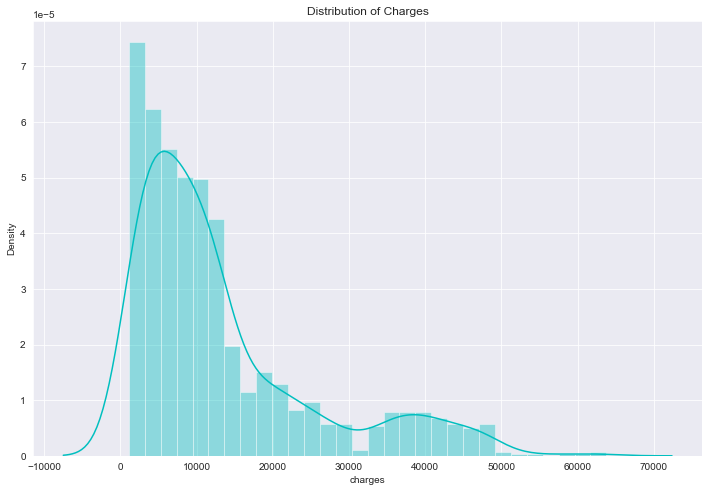

In [159]:
#Visualizing how the charges are distributed.
f,ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

- We find that the distribution of charges is right skewed. 
- We have several techniques like log transform,square root transform,box-cox transform. 
- Now we are going to use log transform


In [160]:
from scipy import stats
charges_log=np.log(df['charges']) 
charges_log.skew() #finding how much is skewed

-0.09009752473024583

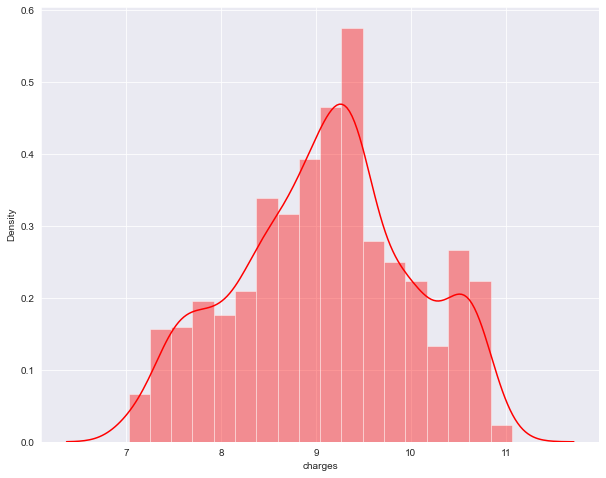

In [161]:
f, ax = plt.subplots(1, 1, figsize=(10, 8))
ax = sns.distplot(np.log(df['charges']), kde = True, color = 'r' )

From the above graph, we find that the data is normally distributed.

Text(0.5, 1.0, 'Distribution of Age')

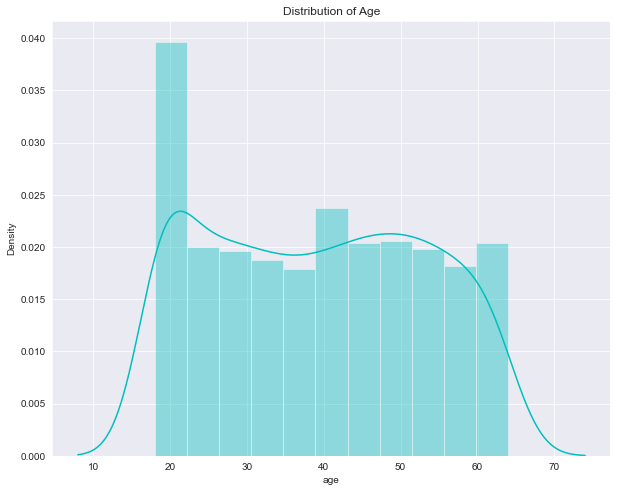

In [162]:
#Visualizing how the age is distributed.
f,ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.distplot(df['age'], kde = True, color = 'c')
plt.title('Distribution of Age')

We find that people are aged between 20 and 60.

Text(0.5, 1.0, 'Distribution of bmi')

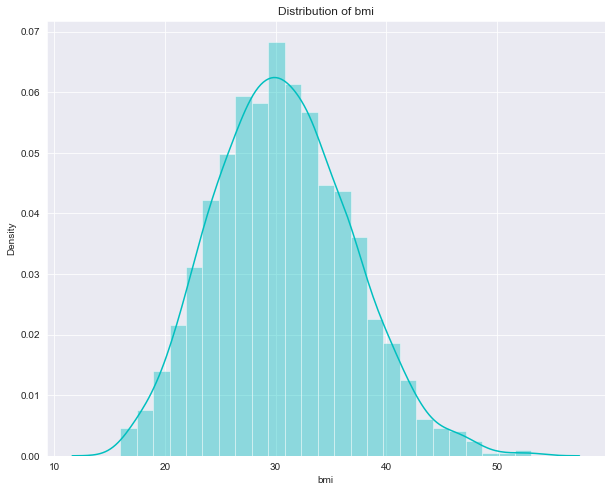

In [163]:
#Visualizing how the body mass index is distributed.
f,ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.distplot(df['bmi'], kde = True, color = 'c')
plt.title('Distribution of bmi')

Text(0.5, 1.0, 'Children')

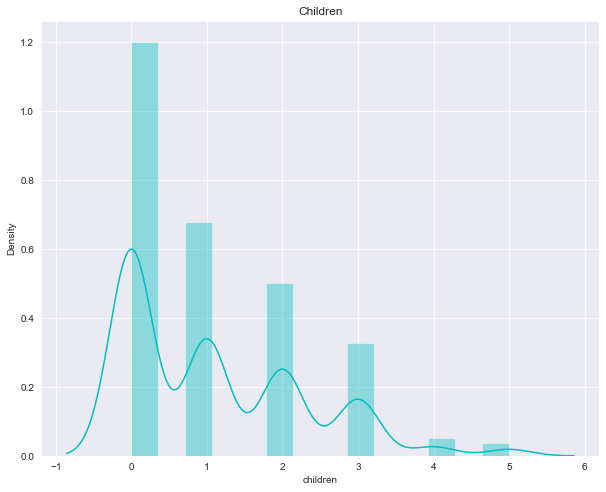

In [164]:
#Visualizing how the children are distributed.
f,ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.distplot(df['children'], kde = True, color = 'c')
plt.title('Children')

male      676
female    662
Name: sex, dtype: int64


Text(0.5, 1.0, 'Sex')

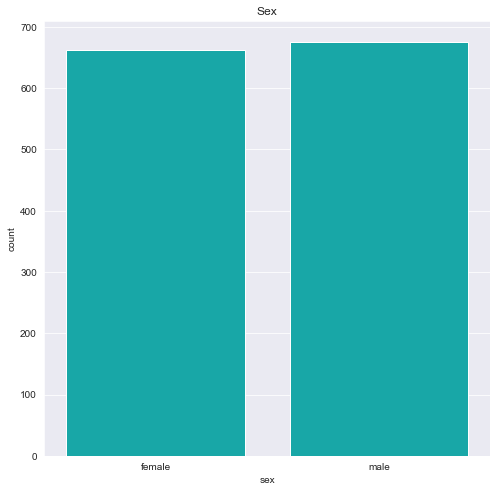

In [165]:
print(df['sex'].value_counts())
f,ax = plt.subplots(1,1, figsize=(8,8))
ax = sns.countplot(df['sex'], color = 'c')  #Using countplot since its a categorical column
plt.title('Sex')

We find that both male and female are almost equally insuranced. But, male are bit high in number.

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


Text(0.5, 1.0, 'Region')

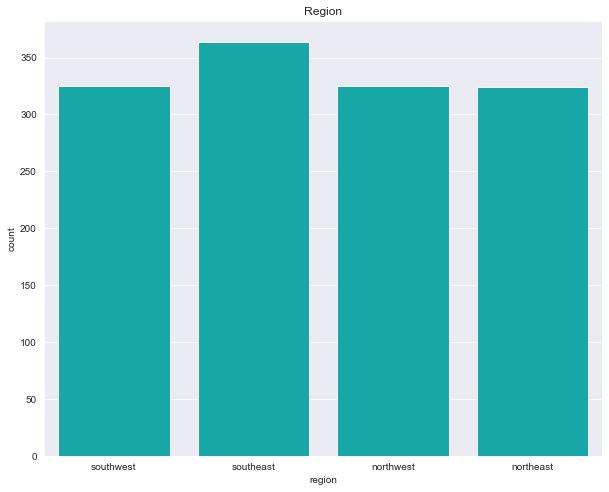

In [166]:
print(df['region'].value_counts())
f,ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.countplot(df['region'], color = 'c') #using countplot since its a categorical column
plt.title('Region')

We find that maximum number of people are from southeast region.

no     1064
yes     274
Name: smoker, dtype: int64


Text(0.5, 1.0, 'Smoker')

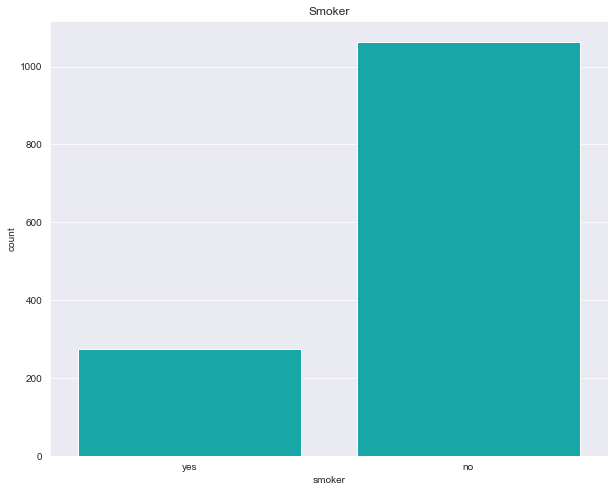

In [167]:
print(df['smoker'].value_counts())
f,ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.countplot(df['smoker'], color = 'c')
plt.title('Smoker')

The people who are non smokers are high in number. 

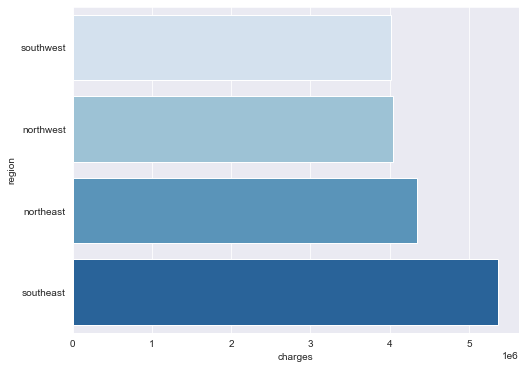

In [168]:
#Lets visualize the charges paid by region
charges = df['charges'].groupby(df.region).sum().sort_values(ascending=True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

We find that maximum charges are paid by the southeast region people and least in southwest region.

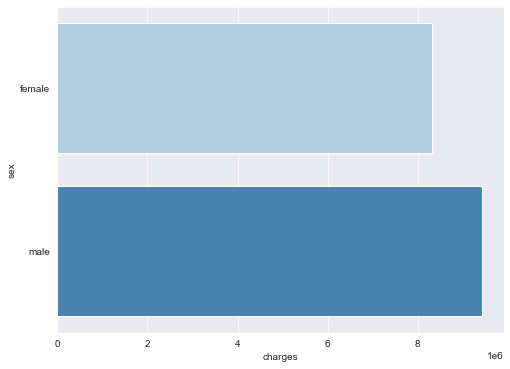

In [169]:
charges = df['charges'].groupby(df.sex).sum().sort_values(ascending=True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

We find Insurance costs are higher among male population

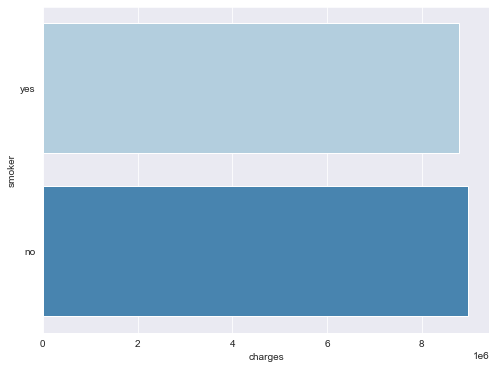

In [170]:
charges = df['charges'].groupby(df.smoker).sum().sort_values(ascending=True)
f, ax = plt.subplots(1, 1, figsize=(8,6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

In [171]:
#Replacing the categorical columns with 1,0
df.smoker.replace(('yes', 'no'), (1, 0), inplace=True)
df.sex.replace(('female','male'), (1, 0), inplace=True)

Text(0.5, 1.0, 'Region wise smokers count')

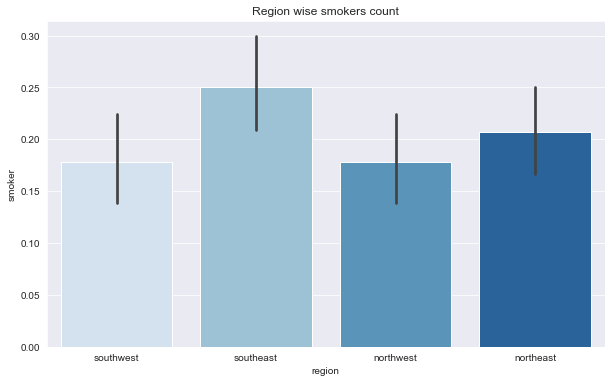

In [172]:
#Lets visualize in which region smokers are high
ax= plt.figure(figsize=(10,6))
sns.barplot(x='region', y='smoker', data=df, palette='Blues' )
plt.title('Region wise smokers count')

We find that maximum number of smokers are from southeast region

- Lets visualize how the charges affect based on various factors

In [174]:
df.smoker.replace((1,0), ('yes','no'), inplace=True)
df.sex.replace((1,0), ('female','male'), inplace=True)

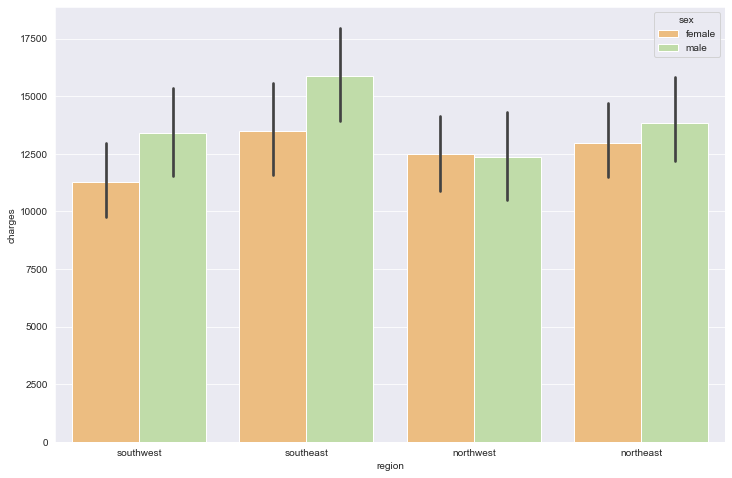

In [175]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges',hue='sex', data=df, palette='Spectral')

From the above plot, we find that charges are high among male in southeast region. 

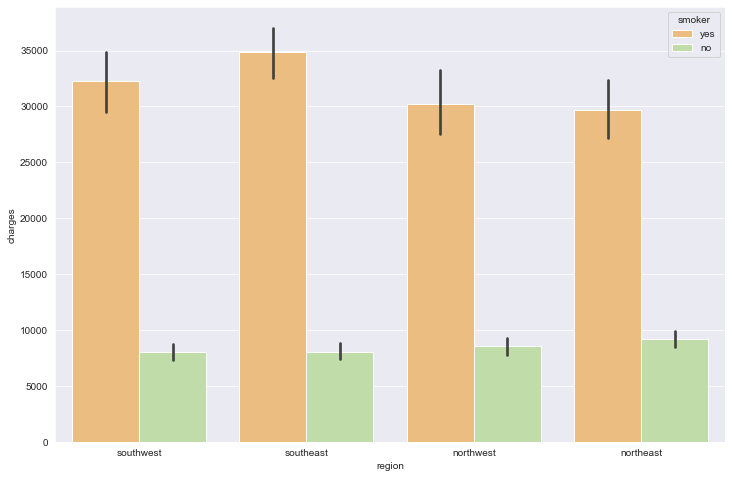

In [176]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges',hue='smoker', data=df, palette='Spectral')

From the above plot, we find smokers pay the highest charges for the insurance. 

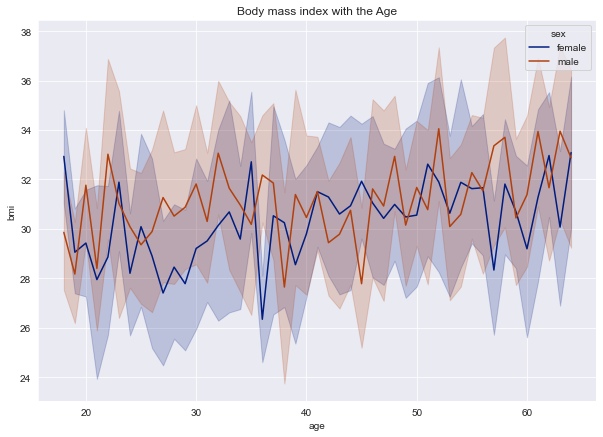

In [178]:
## Age vs BMI
plt.figure(figsize=(10,7))
sns.lineplot(data=df,x="age",y="bmi",hue="sex",palette='dark')
plt.title("Body mass index with the Age")
plt.show()

<AxesSubplot:xlabel='bmi', ylabel='charges'>

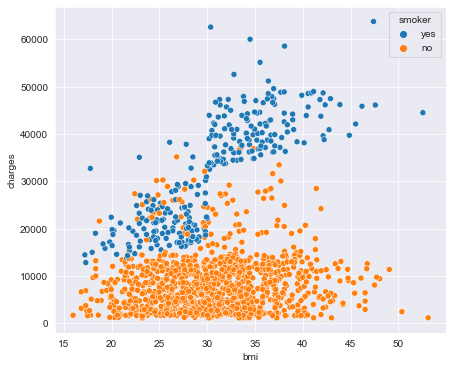

In [179]:
plt.figure(figsize = (7, 6))
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = df)

From the above scatterplot, we see the positive relationship between bmi and charges but charges for smokers are higher in comparison to non-smokers. We can conclude that smoking significantly raises the premium levels for health insurance.

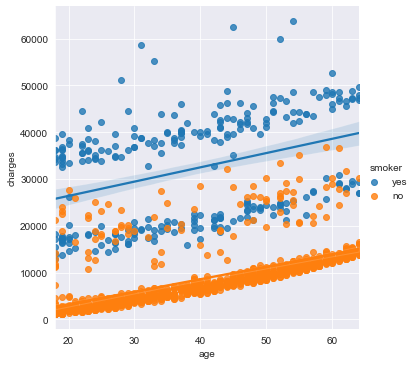

In [180]:
sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker')

We find that there is a positive relationship between age and charges. 

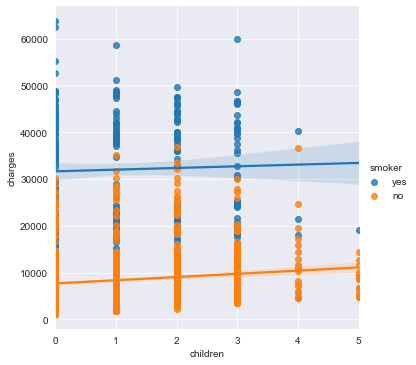

In [181]:
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker')


From the above plot, we find that smokers pay the highest charges and people who have children generally smoke less.

<AxesSubplot:>

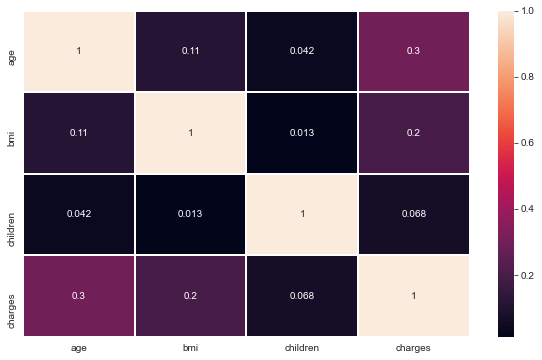

In [182]:
heatmap=df.corr()
ax= plt.figure(figsize=(10,6))
sns.heatmap(heatmap,linewidths=1,linecolor='white',annot=True)

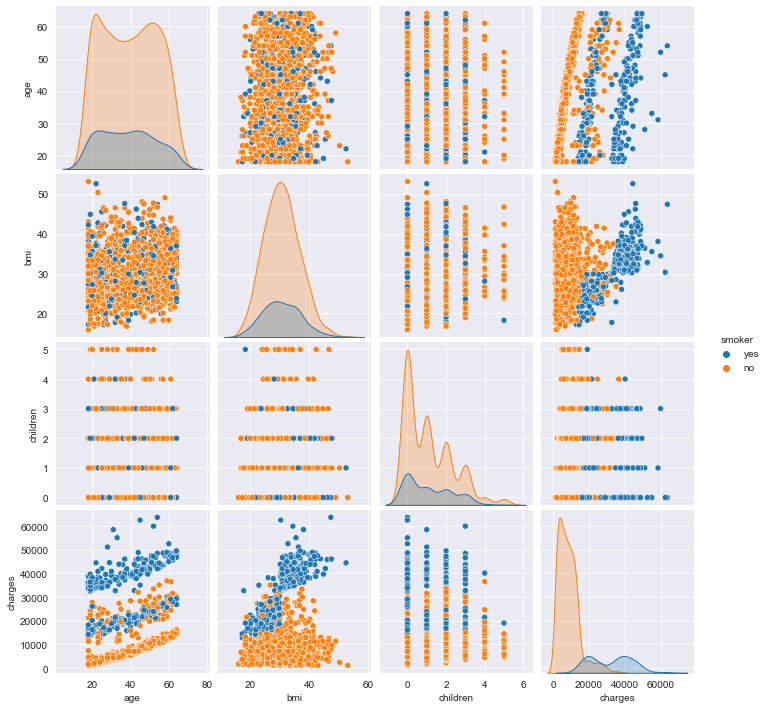

In [183]:
sns.pairplot(data=df, hue = 'smoker')

Here, we can examine how smoking correlates with the other numerical variables in our dataset.

- Converting categorical columns by encoding techniques

In [185]:
# Encoding "sex" column 
df.replace({'sex': {'male' : 0, 'female' : 1}}, inplace = True)
# Encoding "smoker" column 
df.replace({'smoker': {'yes' : 0, 'no' : 1}}, inplace = True)
# Encoding "region" column 
df.replace({'region': {'southeast' : 0, 'southwest' : 1, 'northeast' : 2, 'northwest' : 3}}, inplace = True)

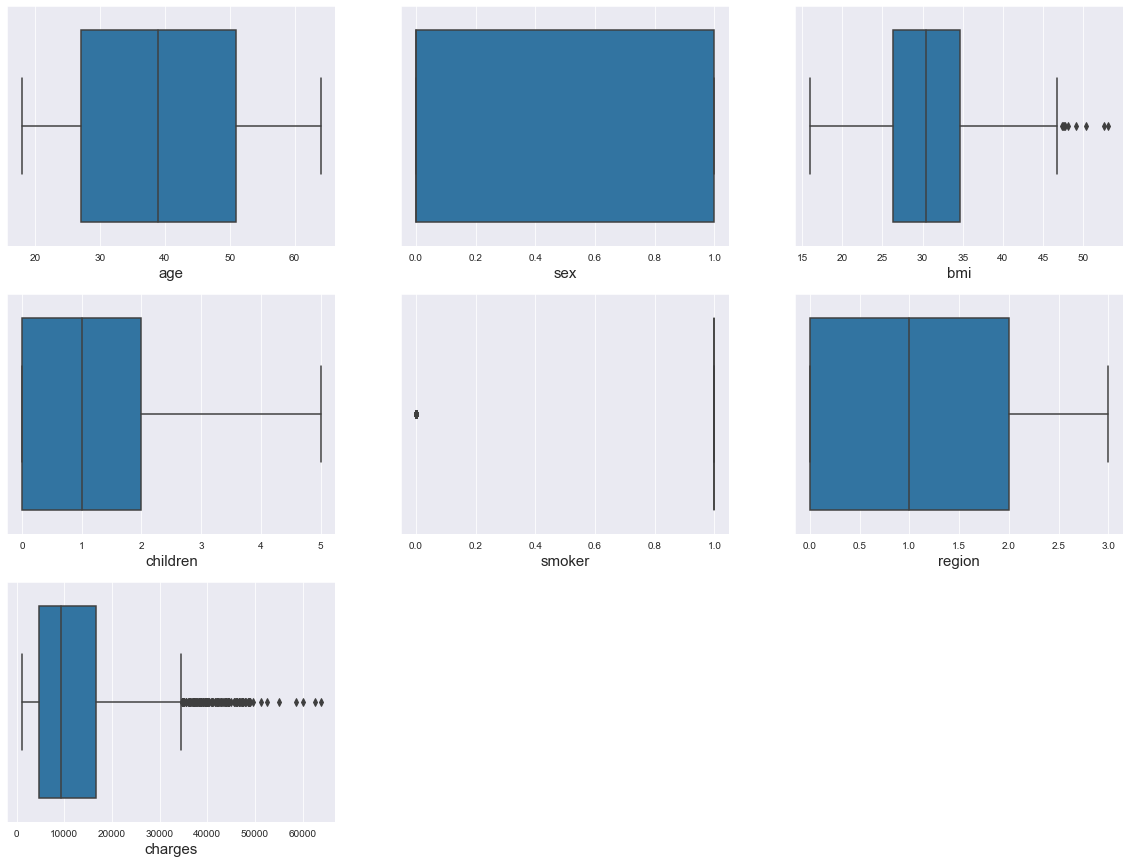

In [186]:
# Boxplots of all the columns
plt.figure(figsize=(20,15))
plotnumber=1
for column in df:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

From the box plot, we find that outliers are present in bmi and charges column. Since charges is a target variable. We ignore it and modify the outliers in bmi column

In [187]:
#Creating a function to drop the outliers in the bmi column
def drop_outliers(df,col_name):
    iqr=1.5+(np.percentile(df[col_name],75)-np.percentile(df[col_name],25))
    df.drop(df[df[col_name]>(iqr+np.percentile(df[col_name],75))].index,inplace=True)
    df.drop(df[df[col_name]<(np.percentile(df[col_name],25)-iqr)].index,inplace=True)

In [188]:
drop_outliers(df,'bmi')

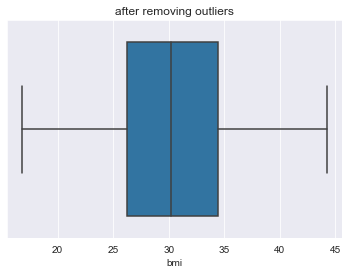

In [189]:
sns.boxplot(df['bmi'])
plt.title('after removing outliers')
plt.show()

In [190]:
# Correlation between charges and features 
round(df.corr()[['charges']].sort_values(by='charges', 
                                                ascending=False), 3)


,charges
charges,1.000
age,0.308
bmi,0.197
children,0.074
region,-0.050
sex,-0.066
smoker,-0.784


- feature 'smoker' is highly negatively correlated to the target 'charges'
- features 'age' and 'bmi' are slighty correlated to the target 'charges'
- features 'children' and 'sex' are poorly correlated to the target 'charges'

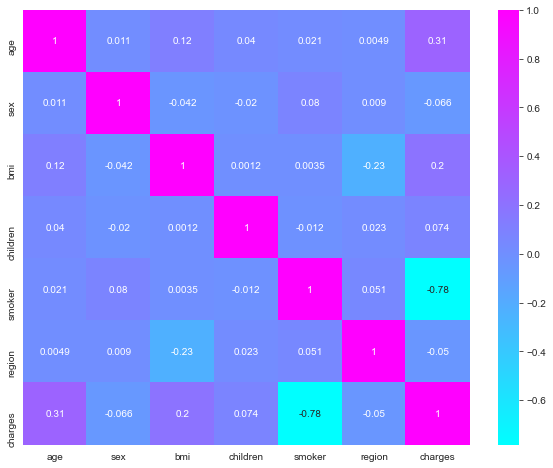

In [192]:
f, ax = plt.subplots(1, 1, figsize=(10,8))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

##### - Results by analyzing and visualizing the data

- Dataset Doesn't Have Any Missing Values
- There Are Three Categorical Columns - sex,smoker,region
- There Are Four Numerical Columns - age,bmi,children,charges
- Insurance Charges increases with increase in Age
- A Smoker Has Higher Insurance Charges Than A Non-Smoker.
- Males Smokes More Than Females.
- People Having Less Children most likely To Opt for an Insurance.
- The Insurance Charge Based On a Region is Also Similar.
- Southeast region has more amount of smokers and old people than other regions.

##### Building the models

In [222]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

In [223]:
#Splitting the data into train and test
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### Linear Regression

In [290]:
#LINEAR REGRESSION
lr= LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

# Scores:
print("Model training score:",lr.score(x_train,y_train)*100,'%')
print('Model Testing Score:',lr.score(x_test, y_test)*100,'%')
print('R2 Score:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print("RMSE: ",mean_squared_error(y_test, y_pred, squared=False))

Model training score: 75.4988474532987 %
Model Testing Score: 72.73860279585351 %
R2 Score: 0.7273860279585351
MSE: 42531891.61946123
RMSE:  6521.647922071632


#### Random Forest Regressor

In [292]:
#RANDOM FOREST REGRESSOR
rfr= RandomForestRegressor()
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)

# Scores:
print("Model training score:",rfr.score(x_train,y_train)*100,'%')
print('Model Testing Score:',rfr.score(x_test, y_test)*100,'%')
print('R2 Score:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print("RMSE: ",mean_squared_error(y_test, y_pred, squared=False))

Model training score: 97.53051508338979 %
Model Testing Score: 83.18335234604614 %
R2 Score: 0.8318335234604614
MSE: 26236506.88424155
RMSE:  5122.158420455341


#### K Neigbor Regressor

In [294]:
#K NEIGHBOR REGRESSOR
KNN= KNeighborsRegressor()
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)

# Scores:
print("Model training score:",KNN.score(x_train,y_train)*100,'%')
print('Model Testing Score:',KNN.score(x_test, y_test)*100,'%')
print('R2 Score:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print("RMSE: ",mean_squared_error(y_test, y_pred, squared=False))

Model training score: 38.947504168988154 %
Model Testing Score: 13.03820479988711 %
R2 Score: 0.1303820479988711
MSE: 135673517.42053837
RMSE:  11647.897553659132


#### - Hyper Parameter Tuning

In [295]:
from sklearn.model_selection import GridSearchCV
grid_params={'weights':['uniform','distance'],
           'metric':['minkowski','euclidean','manhattan'],
           'n_neighbors':[5,7,9,11,13,15]}


In [296]:
gridsearch=GridSearchCV(KNN,grid_params,cv=3)


In [297]:
#fit the model on our train set
g_res=gridsearch.fit(x_train,y_train)

In [298]:
g_res.best_score_

0.31586561050958106

In [299]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

In [300]:
knn=KNeighborsRegressor(n_neighbors=11,weights='distance',algorithm='brute',metric='manhattan')
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='brute', metric='manhattan', n_neighbors=11,
                    weights='distance')

In [301]:
y_knn=knn.predict(x_test)

In [302]:

print("Model training score:",knn.score(x_train,y_train)*100,'%')
print('Model Testing Score:',knn.score(x_test, y_test)*100,'%')

Model training score: 99.82207687785522 %
Model Testing Score: 38.11769829648046 %


- After performing hyper parameter tuning on knn model, we find that the model training and testing accuracy has increased but that accuracy is very less. So, we conclude that Knn model doesn't fit for predicting the insurance cost charges.

#### Decision Tree

In [303]:
#DECISION TREE REGRESSOR
dtr=DecisionTreeRegressor(random_state=1)
dtr.fit(x_train, y_train)
y_pred = dtr.predict(x_test)

# Scores:
print("Model training score:",dtr.score(x_train,y_train)*100,'%')
print('Model Testing Score:',dtr.score(x_test, y_test)*100,'%')
print('R2 Score:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print("RMSE: ",mean_squared_error(y_test, y_pred, squared=False))

Model training score: 99.82207687785522 %
Model Testing Score: 70.88561190023401 %
R2 Score: 0.7088561190023401
MSE: 45422836.91306305
RMSE:  6739.6466460092


#### Ridge

In [304]:
#RIDGE REGRESSION
ri=Ridge()
ri.fit(x_train, y_train)
y_pred = ri.predict(x_test)

# Scores:
print("Model training score:",ri.score(x_train,y_train)*100,'%')
print('Model Testing Score:',ri.score(x_test, y_test)*100,'%')
print('R2 Score:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print("RMSE: ",mean_squared_error(y_test, y_pred, squared=False))

Model training score: 75.49654858101206 %
Model Testing Score: 72.76915940828445 %
R2 Score: 0.7276915940828445
MSE: 42484218.695053205
RMSE:  6517.991921984347


#### Lasso

In [305]:
from sklearn.linear_model import LassoCV

In [306]:
lassocv=LassoCV(alphas=None,max_iter=100,normalize=True)
lassocv.fit(x_train,y_train)
alpha=lassocv.alpha_
alpha


0.3058996608369135

In [307]:
#LASSO REGRESSION
la= Lasso(alpha,max_iter=1000,normalize=False)
la.fit(x_train, y_train)
y_pred = la.predict(x_test)

# Scores:
print("Model training score:",la.score(x_train,y_train)*100,'%')
print('Model Testing Score:',la.score(x_test, y_test)*100,'%')
print('R2 Score:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print("RMSE: ",mean_squared_error(y_test, y_pred, squared=False))


Model training score: 75.49884669395374 %
Model Testing Score: 72.73954735810189 %
R2 Score: 0.7273954735810189
MSE: 42530417.959880434
RMSE:  6521.534938945006


#### SVR

In [308]:
#SUPPORT VECTOR REGRESSOR
svr= SVR()
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)

# Scores:
print("Model training score:",svr.score(x_train,y_train)*100,'%')
print('Model Testing Score:',svr.score(x_test, y_test)*100,'%')
print('R2 Score:',r2_score(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print("RMSE: ",mean_squared_error(y_test, y_pred, squared=False))



Model training score: -10.159378143466768 %
Model Testing Score: -11.906551749887907 %
R2 Score: -0.11906551749887906
MSE: 174591100.18799484
RMSE:  13213.292556664097


- R-squared is a statistical measure of how close the data are to the fitted regression line. An R-Square above 0.7 would generally be seen as showing a high level of correlation, where as a measure of below 0.4 would show a low correlation. By building the models, we find that R2 score is more than 0.7 for Lasso regression(0.72),Ridge regression(0.72),Decision Tree(0.70), Random forest regressor(0.83) and Linear Regression(0.72)

- By training and building all the several models, we find that accuracy score is highest for 'Random Forest regressor' i.e.,83%. Hence that model best fits for predicting the medical insurance charges.

In [309]:
#saving the model
import pickle
filename = 'MedicalCostInsurance.pkl'
pickle.dump(rfr, open(filename, 'wb'))

#### Conclusion

In [310]:
loaded_model=pickle.load(open('MedicalCostInsurance.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

83.18335234604614


In [311]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_pred[:]],index=['Predicted','Original'])

In [312]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,253,254,255,256,257,258,259,260,261,262
Predicted,5727.753032,16146.609483,3414.100332,5338.142415,6947.751843,2325.661485,6944.435683,5100.848631,40561.163121,1557.904067,...,5833.601938,25669.392174,4382.387811,22897.825247,39833.653921,43146.035012,15267.953780,11067.694361,6324.007061,7176.419434
Original,9144.618681,9330.535324,9135.251490,9211.255233,9251.125438,9141.396189,9247.832029,9179.988005,9200.596552,9148.809126,...,9157.287869,9264.021289,9136.930186,9237.643405,9220.692129,9204.797708,9365.955576,9345.610383,9235.814986,9188.137683
